<a href="https://colab.research.google.com/github/Xuli2317/TU155-project/blob/main/Copy_of_Project_Na%C3%AFve_Bayes_%E0%B8%97%E0%B8%B3%E0%B8%99%E0%B8%B2%E0%B8%A2%E0%B9%80%E0%B8%AB%E0%B9%87%E0%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TU155: Naive Bayes ทำนายเห็ด


* colab
https://colab.research.google.com/drive/18CXswJcC51fA4jO7yUMy077nSI1dfqqj

* dataset
https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset

* Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

* Importing the data

In [ ]:
mushroom = pd.read_csv('mushroom_cleaned.csv')

# Data description

**Mushroom Dataset** นี้เป็น Dataset ที่เกี่ยวข้องกับเห็ดโดยมี feature ทั้งหมด 9 columns

In [ ]:
mushroom.shape

(54035, 9)

In [ ]:
mushroom.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

1. Cap Diameter เส้นผ่าศูนย์กลางหมวกเห็ด
2. Cap Shape รูปร่างหมวกเห็ด
3. Gill Attachment สิ่งที่แนบมากับครีบเห็ด
4. Gill Color ครีบเห็ดสี
5. Stem Height ความสูงของลำต้น
6. Stem Width ความกว้างของลำต้น
7. Stem Color สีก้าน
8. Season ฤดูกาล
9. Class สามารถรับประทานได้หรือไม่ได้

In [ ]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


attribute ที่จะใช้ทำนาย คือ
---
โดยเราจะนำข้อมูลจาก Dataset ใน column ที่ 9.Class สามารถรับประทานได้หรือไม่ได้ (เป็นเห็ดพิษ)
มาเป็น attribute ที่เราอยากจะทำนาย
**โดยจะทำนายว่าเห็ดนี้สามารถรับประทานได้หรือไม่ได้ (เป็นเห็ดพิษ)**

attribute ที่จะใช้เป็น input ได้แก่
---
1. Cap Diameter เส้นผ่าศูนย์กลางหมวกเห็ด
2. Cap Shape รูปร่างหมวกเห็ด
3. Gill Attachment สิ่งที่แนบมากับครีบเห็ด
4. Gill Color ครีบเห็ดสี
5. Stem Height ความสูงของลำต้น
6. Stem Width ความกว้างของลำต้น
7. Stem Color สีก้าน
8. Season ฤดูกาล

* Exploratory Data Analysis

In [ ]:
mushroom.head(5)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
mushroom["class"].value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

**class 0** คือ รับประทานได้

**class 1** คือ รับประทานไม่ได้ (เป็นเห็ดมีพิษ)

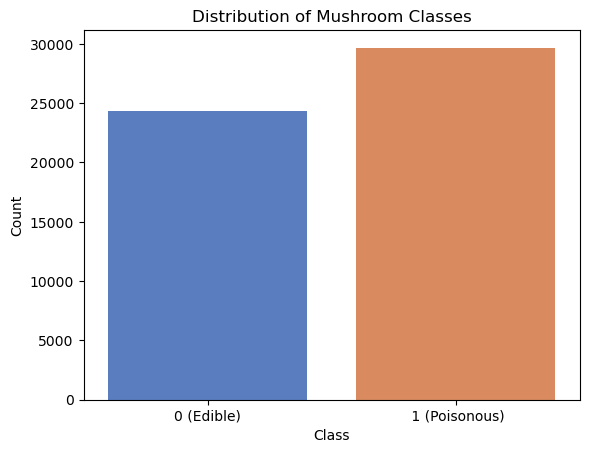

In [ ]:
# Create count plot
sns.countplot(x="class", data=mushroom, palette="muted")
# Set x-axis label
plt.xlabel("Class")
# Set y-axis label
plt.ylabel("Count")
# Set title
plt.title("Distribution of Mushroom Classes")
# Set x-axis ticks
plt.xticks(ticks=[0, 1], labels=["0 (Edible)", " 1 (Poisonous)"])
# Show plot
plt.show()

เห็นได้ว่าจำนวนเห็ดพิษมีมากกว่าเห็ดที่รับประทานได้

In [ ]:
mushroom.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


**ดูการกระจายตัวของข้อมูลแต่ละ columns**

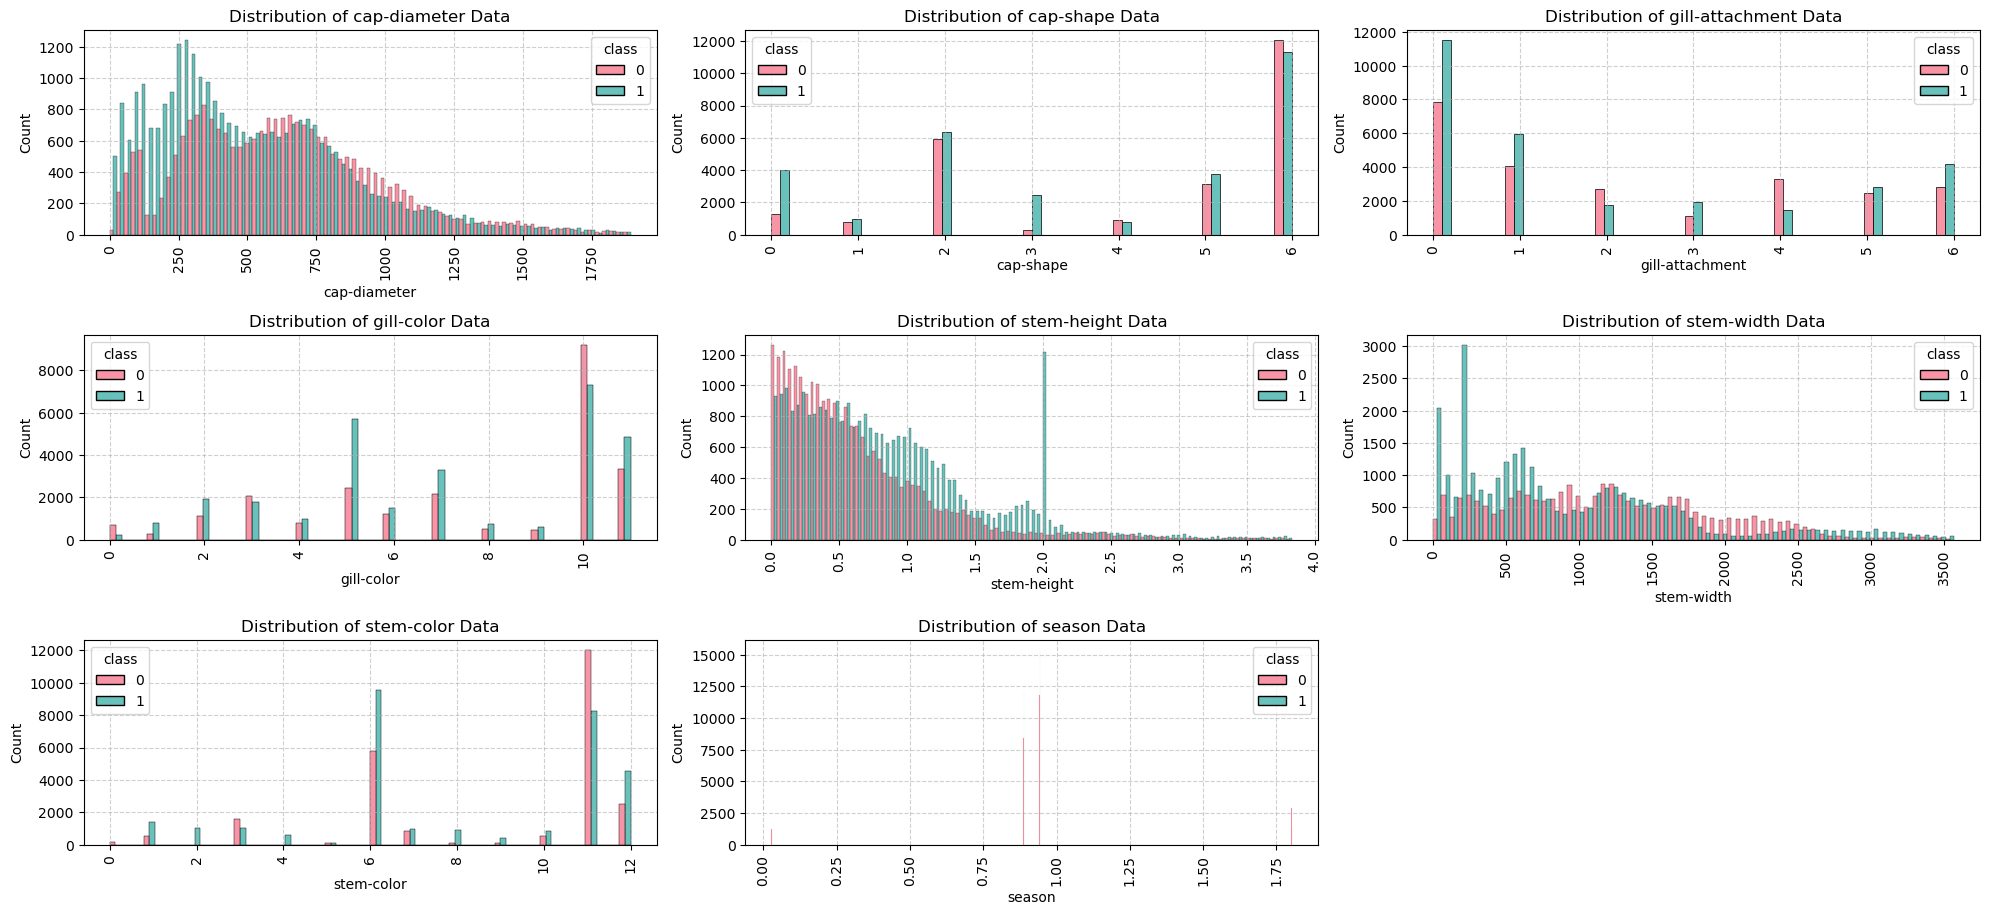

In [ ]:
fig = plt.figure(figsize=(20, 30))  # ปรับขนาดของกราฟให้ใหญ่ขึ้นเพื่อให้มองเห็นข้อมูลได้ชัดเจน

gs = GridSpec(10, 3, figure=fig)  # สร้าง GridSpec 10x3 สำหรับกราฟ

for i, col in enumerate(mushroom.columns[:-1], 0):
    ax = fig.add_subplot(gs[i])
    sns.histplot(data=mushroom, x=col, hue="class", multiple="dodge", palette="husl", ax=ax)  # เลือกใช้สี palette แบบ husl
    ax.set_title(f"Distribution of {col} Data", fontsize=12)  # เพิ่มขนาดตัวอักษรของชื่อกราฟ
    ax.set_xlabel(f"{col}", fontsize=10)  # เพิ่มชื่อแกน X
    ax.set_ylabel("Count", fontsize=10)  # เพิ่มชื่อแกน Y
    ax.tick_params(axis='x', rotation=90)  # หมุนข้อความบนแกน X เพื่อให้มองเห็นได้ชัดเจน
    ax.grid(True, linestyle='--', alpha=0.6)  # เพิ่มเส้นกริดเพื่อช่วยในการอ่านข้อมูล

plt.tight_layout()  # ปรับการจัดวางเพื่อให้กราฟไม่ซ้อนทับ
plt.show()  # แสดงกราฟ


จากกราฟจะเห็นได้ว่าข้อมูลนั้นเป็น Skewness หรือข้อมูลว่ามีการกระจายตัวไปจากค่าเฉลี่ย

* Preprocessing

---
เตรียมข้อมูล โดยการแบ่งชุดข้อมูลเป็น ชุดข้อมูลสอน (Training Set) สำหรับสร้างโมเดล กับ ชุดข้อมูลทดสอบ (Test Set) สำหรับประเมินประสิทธิภาพของโมเดล ด้วยฟังก์ชัน train_test_split โดยเราจะสุ่มเลือกข้อมูล 40% เป็น Test Set และอีก 60% เป็น Training Set

In [ ]:
X = mushroom.drop('class', axis = 1) # grabs everything else but 'Class'
y = mushroom['class'] # y is the column we're trying to predict

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

โดยข้อมูลที่ใช้ในการ train มี 32,421 ชุด และข้อมูลที่ใช้ในการ test มี 21,614 ชุด

In [ ]:
len(X_train), len(X_test)

(32421, 21614)

# Build Model
---
โดยเทคนิค `naive_bayes` จะมีด้วยกัน 4 เทคนิค
1. GaussianNB
2. MultinomialNB
3. ComplementNB
4. BernoulliNB

เนื่องจาก dataset ของเรานั้นการกระจายตัวไปซ้ายมาก ซึ่งเห็นได้ชัดเจนในหลายฟีเจอร์ ดังนั้น dataset คาดว่าน่าจะเหมาะกับกับ MultinomialNB มากกว่าชนิดอื่น แต่ในบาง feature นั้นการกระจายก็ใกล้เคียงกัน ด้วยเหตุนี้อาจทำให้ GaussianNB ซึ่งเหมาะกับ normal distrubution อาจจะมีความแม่นยำกว่า
ดังนั้นอาจจะเหมาะกับวิธี GaussianNB


other classification techniques ที่ใช้คือ
1. Random Forest Classification

metrics ที่ใช้คือ
1. accuracy_score ความแม่นยำ
2. precision_score ความแม่ยำในการประเมินในกลุ่มเป้าหมาย
3. recall_score ความสามารถในการตรวจเหตุการณ์ที่เราสนใจ
4. f1_score ค่าเฉลี่ยแบบ harmonic mean ระหว่าง precision และ recall
5. classification_report ฟังก์ชันที่ใช้ใน scikit-learn เพื่อสร้างรายงานการประเมินผลของการทำนายจากโมเดลคลาสิฟายต์ (classification model) ซึ่งจะแสดงค่าคะแนนที่สำคัญเช่น precision, recall, f1-score, และ support สำหรับแต่ละคลาส รวมถึงค่าเฉลี่ยของทั้งหมดในระดับ macro avg และ weighted avg
6. confusion_matrix เครื่องมือที่ช่วยในการประเมินประสิทธิภาพของโมเดลการจำแนกประเภท (classification model) โดยแสดงจำนวนของตัวอย่างที่ถูกจำแนกถูกต้องและผิดพลาดในแต่ละคลาส
---

* Importing Required Libraries

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
model_dict ={}

สร้างมาเพื่อเก็บข้อมูลของค่า accuracy_score

---

# Experiment
---
เราสามารถวัด performance ได้ด้วยค่า accuracy และ Probability

# naive_bayes
## GaussianNB
### Implement Using Scikit-Learn
* ตั้งค่าเริ่มต้นของโมเดล ด้วยการสร้าง Instance ของคลาส `GaussianNB`
* ทำการ Train โมเดล ด้วยการเรียนคำสั่ง [`fit`]
* ทำการทำนายบน Test Set ด้วยคำสั่ง [`predict`]

In [ ]:
gnb = GaussianNB()
pridictorgnb = gnb.fit(X_train, y_train)
y_predgnb = pridictorgnb.predict(X_test)
y_predgnb

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X_test.shape[0], (y_test != y_predgnb).sum()))

Number of mislabeled points out of a total 21614 points : 7785


* คำนวณค่า Probability

---
Probability คือ 0.62613961

In [ ]:
y_probagnb = gnb.predict_proba(X_test)
y_probagnb[0]

array([0.37386039, 0.62613961])

ทำ Confusion Matrix วัดความสามารถของ machine learning ในการแก้ปัญหา classification

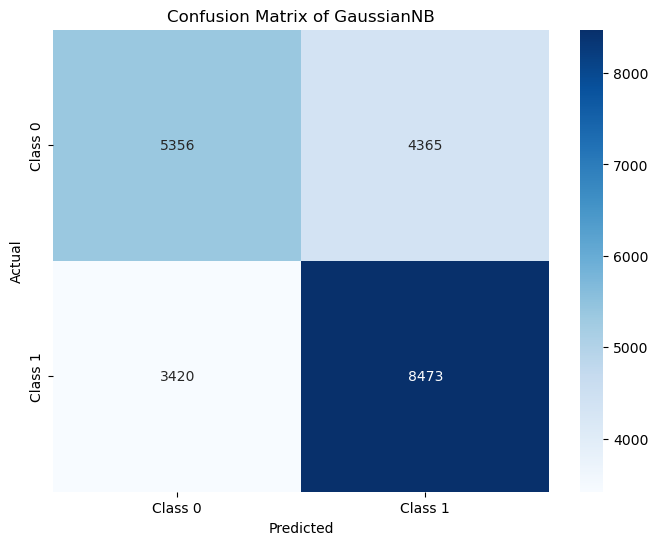

In [ ]:
gnb = confusion_matrix(y_test, y_predgnb)
plt.figure(figsize=(8, 6))
sns.heatmap(gnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of GaussianNB')
plt.show()

In [ ]:
print(classification_report(y_test, y_predgnb))

              precision    recall  f1-score   support

           0       0.61      0.55      0.58      9721
           1       0.66      0.71      0.69     11893

    accuracy                           0.64     21614
   macro avg       0.64      0.63      0.63     21614
weighted avg       0.64      0.64      0.64     21614



* คำนวณ accuracy

```
(y_test == y_predgnb).sum() / X_test.shape[0]
```
accuracy_score สามารถได้ผลลัพธ์เช่นเดียวกับ code ข้างต้น

โดยคำสั่งได้ทำการนำ output ที่ได้เก็บไว้ใน model_dict ในชื่อ `GaussianNB`

In [ ]:
accuracy_GaussianNB = accuracy_score(y_test, y_predgnb) #(y_test == y_predgnb).sum() / X_test.shape[0]
model_dict['GaussianNB'] = accuracy_GaussianNB
print(accuracy_GaussianNB)

0.6398167854168595


## BernoulliNB
### Implement Using Scikit-Learn
* ตั้งค่าเริ่มต้นของโมเดล ด้วยการสร้าง Instance ของคลาส `BernoulliNB`
* ทำการ Train โมเดล ด้วยการเรียนคำสั่ง [`fit`]
* ทำการทำนายบน Test Set ด้วยคำสั่ง [`predict`]

In [ ]:
bnb = BernoulliNB()
pridictorbnb = bnb.fit(X_train, y_train)
y_predbnb = pridictorbnb.predict(X_test)
y_predbnb

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X_test.shape[0], (y_test != y_predbnb).sum()))

Number of mislabeled points out of a total 21614 points : 9870


* คำนวณค่า Probability

---
Probability คือ 0.57137338

In [ ]:
y_probabnb = bnb.predict_proba(X_test)
y_probabnb[0]

array([0.42862662, 0.57137338])

ทำ Confusion Matrix วัดความสามารถของ machine learning ในการแก้ปัญหา classification

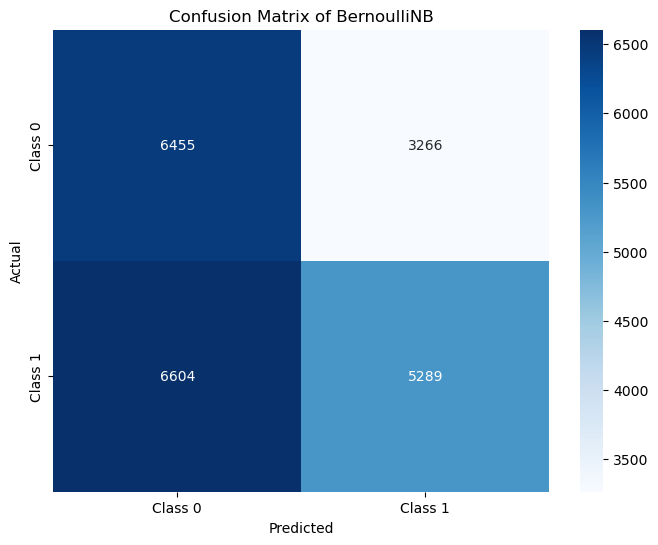

In [ ]:
bnb = confusion_matrix(y_test, y_predbnb)
plt.figure(figsize=(8, 6))
sns.heatmap(bnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of BernoulliNB')
plt.show()

In [ ]:
print(classification_report(y_test, y_predbnb))

              precision    recall  f1-score   support

           0       0.49      0.66      0.57      9721
           1       0.62      0.44      0.52     11893

    accuracy                           0.54     21614
   macro avg       0.56      0.55      0.54     21614
weighted avg       0.56      0.54      0.54     21614



* คำนวณ accuracy

---
โดยคำสั่งได้ทำการนำ output ที่ได้เก็บไว้ใน model_dict ในชื่อ `BernoulliNB`

In [ ]:
accuracy_BernoulliNB = accuracy_score(y_test, y_predbnb)
model_dict['BernoulliNB'] = accuracy_BernoulliNB
print(accuracy_BernoulliNB)

0.5433515314148237


## MultinomialNB
### Implement Using Scikit-Learn
* ตั้งค่าเริ่มต้นของโมเดล ด้วยการสร้าง Instance ของคลาส `MultinomialNB`
* ทำการ Train โมเดล ด้วยการเรียนคำสั่ง [`fit`]
* ทำการทำนายบน Test Set ด้วยคำสั่ง [`predict`]

In [ ]:
mnb = MultinomialNB()
pridictormnb = mnb.fit(X_train, y_train)
y_predmnb = pridictormnb.predict(X_test)
y_predmnb

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X_test.shape[0], (y_test != y_predmnb).sum()))

Number of mislabeled points out of a total 21614 points : 8912


* คำนวณค่า Probability

---
Probability คือ 0.80682051

In [ ]:
y_probamnb = mnb.predict_proba(X_test)
y_probamnb[0]

array([0.80682051, 0.19317949])

ทำ Confusion Matrix วัดความสามารถของ machine learning ในการแก้ปัญหา classification

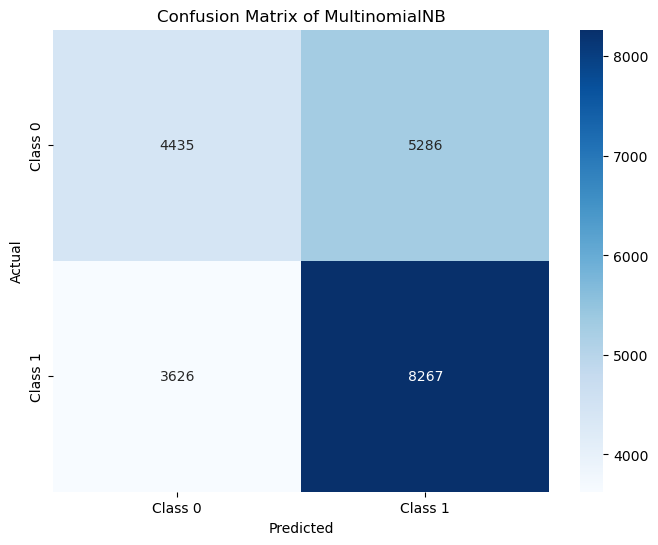

In [ ]:
mnb = confusion_matrix(y_test, y_predmnb)
plt.figure(figsize=(8, 6))
sns.heatmap(mnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of MultinomialNB')
plt.show()

In [ ]:
print(classification_report(y_test, y_predmnb))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50      9721
           1       0.61      0.70      0.65     11893

    accuracy                           0.59     21614
   macro avg       0.58      0.58      0.57     21614
weighted avg       0.58      0.59      0.58     21614



* คำนวณ accuracy

---
โดยคำสั่งได้ทำการนำ output ที่ได้เก็บไว้ใน model_dict ในชื่อ `MultinomialNB`

In [ ]:
accuracy_MultinomialNB = accuracy_score(y_test, y_predmnb)
model_dict['MultinomialNB'] = accuracy_MultinomialNB
print(accuracy_MultinomialNB)

0.5876746553159989


## ComplementNB
### Implement Using Scikit-Learn
* ตั้งค่าเริ่มต้นของโมเดล ด้วยการสร้าง Instance ของคลาส `ComplementNB`
* ทำการ Train โมเดล ด้วยการเรียนคำสั่ง [`fit`]
* ทำการทำนายบน Test Set ด้วยคำสั่ง [`predict`]

In [ ]:
cnb = ComplementNB()
pridictorcnb = cnb.fit(X_train, y_train)
y_predcnb = pridictorcnb.predict(X_test)
y_predcnb

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

* คำนวณค่า Probability

---
Probability คือ 0.83534315

In [ ]:
y_probacnb = cnb.predict_proba(X_test)
y_probacnb[0]

array([0.83534315, 0.16465685])

ทำ Confusion Matrix วัดความสามารถของ machine learning ในการแก้ปัญหา classification

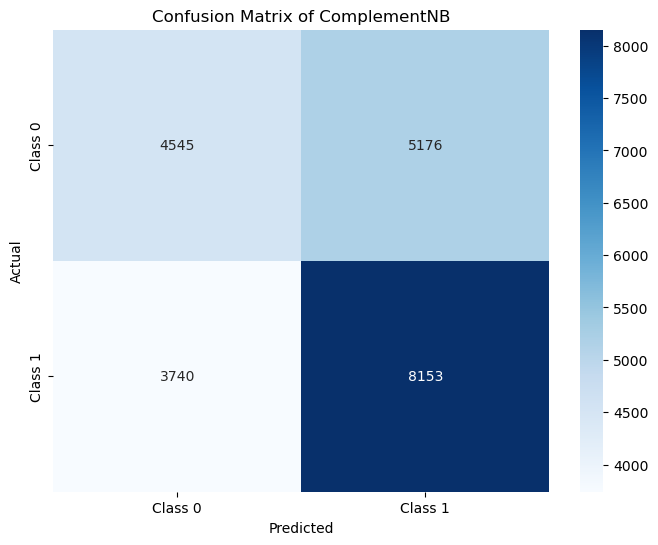

In [ ]:
cmcnb = confusion_matrix(y_test, y_predcnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cmcnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of ComplementNB')
plt.show()

In [ ]:
print(classification_report(y_test, y_predcnb))

              precision    recall  f1-score   support

           0       0.55      0.47      0.50      9721
           1       0.61      0.69      0.65     11893

    accuracy                           0.59     21614
   macro avg       0.58      0.58      0.58     21614
weighted avg       0.58      0.59      0.58     21614



In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X_test.shape[0], (y_test != y_predcnb).sum()))

Number of mislabeled points out of a total 21614 points : 8916


* คำนวณ accuracy, f1, precision, recall

---
โดยคำสั่งได้ทำการนำ output ที่ได้เก็บไว้ใน model_dict ในชื่อ `ComplementNB`

In [ ]:
accuracy_ComplementNBr = accuracy_score(y_test, y_predcnb)
model_dict['ComplementNB'] = accuracy_ComplementNB
print(accuracy_ComplementNB)

0.5874895900805034


# Other classification techniques
## Random Forest Classifier
* ตั้งค่าเริ่มต้นของโมเดล ด้วยการสร้าง Instance ของคลาส `RandomForestClassifier`
* ทำการ Train โมเดล ด้วยการเรียนคำสั่ง [`fit`]
* ทำการทำนายบน Test Set ด้วยคำสั่ง [`predict`]

In [ ]:
rf = RandomForestClassifier()
pridictorrf = rf.fit(X_train, y_train)
y_predrf = pridictorrf.predict(X_test)
y_predrf

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
print("Number of mislabeled points out of a total %d points : %d" \
      % (X_test.shape[0], (y_test != y_predrf).sum()))

Number of mislabeled points out of a total 21614 points : 226


* คำนวณค่า Probability

---
Probability คือ 1

In [ ]:
y_probarf = rf.predict_proba(X_test)
y_probarf[0]

array([0., 1.])

ทำ Confusion Matrix วัดความสามารถของ machine learning ในการแก้ปัญหา classification

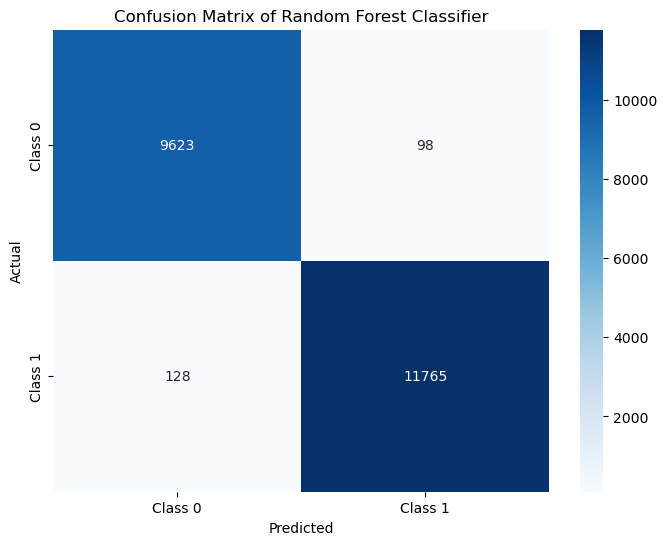

In [ ]:
rf = confusion_matrix(y_test, y_predrf)
plt.figure(figsize=(8, 6))
sns.heatmap(rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

In [ ]:
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9721
           1       0.99      0.99      0.99     11893

    accuracy                           0.99     21614
   macro avg       0.99      0.99      0.99     21614
weighted avg       0.99      0.99      0.99     21614



* คำนวณ accuracy

---
โดยคำสั่งได้ทำการนำ output ที่ได้เก็บไว้ใน model_dict ในชื่อ `RandomForestClassifier`

In [ ]:
accuracy_RandomForestClassifier = accuracy_score(y_test, y_predrf)
model_dict['RandomForestClassifier'] = accuracy_RandomForestClassifier
print(accuracy_RandomForestClassifier)

0.9895438141945035


# Result

จากการนำข้อมูลเข้าสู่การ train และ test model พบว่าค่า accuracy หรือความแม่นยำของแต่ละ model เป็นดังนี้
และในส่วนของค่า Probability นั้นแต่ละ model จะมีค่าอยู่ที่
1. GaussianNB มีค่าอยู่ที่ 0.62613961
2. BernoulliNB มีค่าอยู่ที่ 0.57137338
3. MultinomialNB มีค่าอยู่ที่ 0.80682051
4. ComplementNB มีค่าอยู่ที่ 0.83534315
5. RandomForestClassifier มีค่าอยู่ที่ 0.99

In [ ]:
model_accuracies_df = pd.DataFrame(columns=['Model','Accuracy'])
model_accuracies_df['Model'] = model_dict.keys()
model_accuracies_df['Accuracy'] = model_dict.values()

In [ ]:
model_accuracies_df

,Model,Accuracy
0,GaussianNB,0.639817
1,BernoulliNB,0.543352
2,MultinomialNB,0.587675
3,ComplementNB,0.587490
4,RandomForestClassifier,0.989544


# Conclusion

จากค่า accuracy หรือความแม่นยำของแต่ละ model พบว่าในเทคนิคของ `naive_bayes` โมเดลที่มีความแม่นยำสูงที่สุดคือ `GaussianNB` รองลงมาคือ MultinomialNB, ComplementNB, BernoulliNB ตามลำดับ ตามสมมติฐานของเราดังที่กล่าวไว้ เนื่องจาก dataset ของเรานั้นการกระจายตัวของข้อมูลอาจจะเหมาะกับวิธี GaussianNB มากกว่า MultinomialNB

โดยนอกเหนือจาก `naive_bayes` แล้วก็พบว่า `RandomForestClassifier` มีค่า accuracy สูงที่สุดคือ 0.989544
เพราะ `RandomForestClassifier` เป็น Model ประเภทหนึ่งที่นิยมนำมาทำ Machine Learning ถูกพัฒนาขึ้นจาก Decision Tree ต่างกันที่ Random Forest เป็นการเพิ่มจำนวน Tree เป็น Tree หลายๆ ต้น ทำให้ประสิทธิภาพในการทำงานสูงขึ้น แม่นยำมากขึ้นจึงเหมาะกับการทำ Machine Learning
โดย `Decision Tree`หรือ `RandomForestClassifier` จะใช้ `Gini Impurity` หรือ `Entropy` เป็น Objective Function ในการหาจุดที่ดีที่สุดในการแบ่งข้อมูล (Split point)


*Gini Impurity* คือ การนำเอาผลรวมของค่าความน่าจะเป็นของเหตุการณ์ที่เราสนใจมาคูณด้วย (1 ลบ ค่าความน่าจะเป็นของเหตุการณ์ที่เราสนใจ)
$$1 - \sum_{i=1}^{K} (p_i)^2$$

ในส่วนของค่า Probability นั้น model ที่คาดการณ์ว่าใน y_proba[0] จะอยู่ใน class 1 ซึ่งเป็น class ที่ไม่สามารถรับประทานเห็ดได้และเป็น class ที่ถูกต้อง ได้แก่
1. GaussianNB มีค่าอยู่ที่ 0.62613961
2. BernoulliNB มีค่าอยู่ที่ 0.57137338
3. RandomForestClassifier มีค่าอยู่ที่ 1

In [ ]:
model_accuracies_df.sort_values(by= 'Accuracy', ascending=False)

,Model,Accuracy
4,RandomForestClassifier,0.989544
0,GaussianNB,0.639817
2,MultinomialNB,0.587675
3,ComplementNB,0.587490
1,BernoulliNB,0.543352
